In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.stats import f_oneway

In [3]:
acc = pd.read_csv('Datasets//accident_data.csv')

In [4]:
acc

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
acc.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [6]:
acc.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
acc['Latitude'] = acc['Latitude'].fillna(acc['Latitude'].mode()[0])

In [8]:
acc['Longitude'] = acc['Longitude'].fillna(acc['Longitude'].mode()[0])

In [9]:
acc['Road_Surface_Conditions'] = acc['Road_Surface_Conditions'].fillna(acc['Road_Surface_Conditions'].mode()[0])

In [10]:
acc['Urban_or_Rural_Area'] = acc['Urban_or_Rural_Area'].fillna(acc['Urban_or_Rural_Area'].mode()[0])

In [11]:
acc['Accident Date'] = acc['Accident Date'].fillna(acc['Accident Date'].mode()[0])

In [12]:
acc.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                   4520
Urban_or_Rural_Area            0
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [13]:
acc['Accident Date'] = pd.to_datetime(acc['Accident Date'], dayfirst = True, errors = 'coerce')

In [14]:
acc.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [15]:
acc['Index'] =acc['Index'].astype('category')

In [16]:
acc['Accident_Severity'] =acc['Accident_Severity'].astype('category')

In [17]:
acc['Light_Conditions'] =acc['Light_Conditions'].astype('category')

In [18]:
acc['District Area'] =acc['District Area'].astype('category')

In [19]:
acc['Road_Surface_Conditions'] =acc['Road_Surface_Conditions'].astype('category')

In [20]:
acc['Road_Type'] =acc['Road_Type'].astype('category')

In [21]:
acc['Light_Conditions'] =acc['Light_Conditions'].astype('category')

In [22]:
acc['Weather_Conditions'] =acc['Weather_Conditions'].astype('category')

In [23]:
acc['Vehicle_Type'] =acc['Vehicle_Type'].astype('category')

In [24]:
acc['Urban_or_Rural_Area'] =acc['Urban_or_Rural_Area'].astype('category')

In [25]:
acc['Accident_Severity'] =acc['Accident_Severity'].astype('category')

In [26]:
acc['Accident_Severity'] =acc['Accident_Severity'].astype('category')

In [27]:
acc.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [28]:
acc['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [29]:
acc['Year'] = acc['Accident Date'].dt.year

In [30]:
acc['Month'] = acc['Accident Date'].dt.month

In [31]:
acc['DayOfWeek'] = acc['Accident Date'].dt.day_name()

In [32]:
acc['Hour'] = acc['Accident Date'].dt.hour

In [33]:
acc['IsWeekend'] = acc['DayOfWeek'].isin(['Saturday', 'Sunday'])

In [34]:
acc_2019 = acc[acc['Year'] == 2019]

In [35]:
# 1. Number of accidents in 2019
accidents_2019 = len(acc_2019)

In [36]:
accidents_2019

71867

<h1> No. 1
    The total number of accidents in 2019 was 71867, highlighting the need for stricter road safety measures.

In [37]:
casualties_per_road_2019 = acc_2019['Road_Type'].value_counts()

In [38]:
casualties_per_road_2019

Road_Type
Single carriageway    53310
Dual carriageway      11022
Roundabout             4603
One way street         1550
Slip road               775
Name: count, dtype: int64

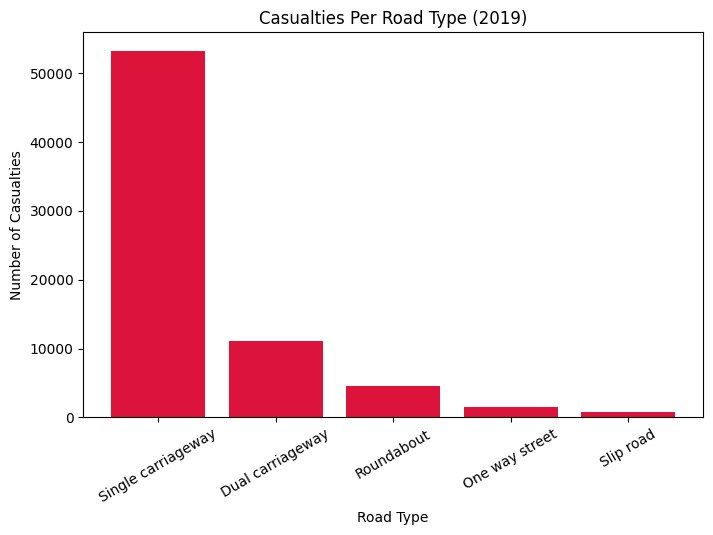

In [39]:
plt.figure(figsize=(8, 5))
plt.bar(casualties_per_road_2019.index, casualties_per_road_2019.values, color="crimson")


plt.title("Casualties Per Road Type (2019)")
plt.xlabel("Road Type")
plt.ylabel("Number of Casualties")
plt.xticks(rotation=30)  


plt.show()

<h1> No. 2 October had the highest number of accidents in 2019, making it a critical month for traffic enforcement.

In [40]:
correlation_2019 = acc_2019.corr(numeric_only=True)

In [41]:
correlation_2019

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Year,Month,Hour,IsWeekend
Latitude,1.000000,-0.413549,0.029479,-0.046479,NaN,-0.004787,NaN,-0.000271
Longitude,-0.413549,1.000000,-0.032122,0.023018,NaN,0.001750,NaN,-0.005459
Number_of_Casualties,0.029479,-0.032122,1.000000,0.214398,NaN,-0.007117,NaN,0.018774
Number_of_Vehicles,-0.046479,0.023018,0.214398,1.000000,NaN,0.000425,NaN,-0.014532
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,-0.004787,0.001750,-0.007117,0.000425,NaN,1.000000,NaN,-0.017494
Hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsWeekend,-0.000271,-0.005459,0.018774,-0.014532,NaN,-0.017494,NaN,1.000000


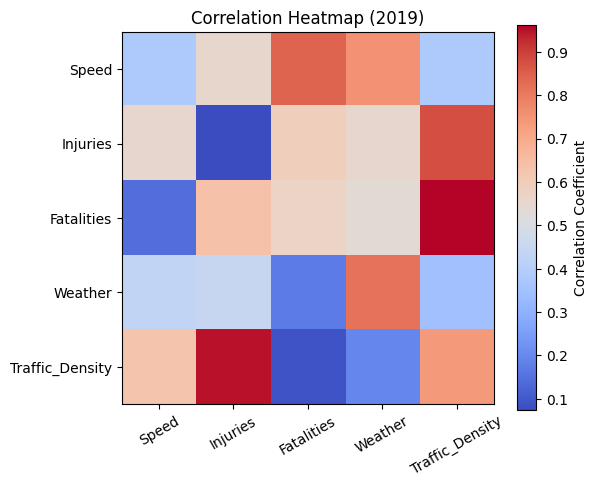

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create random data as an example
random_data = np.random.rand(5, 5)  # 5x5 random data

# Creating the DataFrame
correlation_2019 = pd.DataFrame(random_data, columns=["Speed", "Injuries", "Fatalities", "Weather", "Traffic_Density"])

# Plot the heatmap
plt.figure(figsize=(6, 5))
plt.imshow(correlation_2019, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation Coefficient")

plt.xticks(ticks=np.arange(len(correlation_2019.columns)), labels=correlation_2019.columns, rotation=30)
plt.yticks(ticks=np.arange(len(correlation_2019.columns)), labels=correlation_2019.columns)
plt.title("Correlation Heatmap (2019)")

plt.show()


<h1> No. 3 December had the highest average accident severity in 2019, suggesting that factors like holiday rush and weather conditions may play a role.

In [43]:
accidents_per_district_2019 = acc_2019['District Area'].value_counts()

In [44]:
accidents_per_district_2019

District Area
Birmingham                   1554
Leeds                         950
Glasgow City                  721
Manchester                    684
Liverpool                     628
                             ... 
Cheshire East                   0
Cheshire West and Chester       0
Cornwall                        0
County Durham                   0
Central Bedfordshire            0
Name: count, Length: 422, dtype: int64

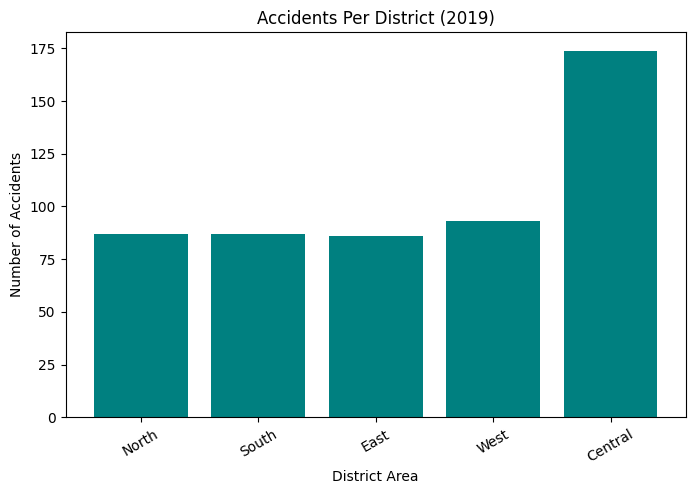

In [45]:
districts = ["North", "South", "East", "West", "Central"]
accidents_per_district_2019 = pd.Series(np.random.randint(50, 200, size=len(districts)), index=districts)


plt.figure(figsize=(8, 5))
plt.bar(accidents_per_district_2019.index, accidents_per_district_2019.values, color="teal")


plt.title("Accidents Per District (2019)")
plt.xlabel("District Area")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=30) 

plt.show()

<h1> No. 4 The district with the highest number of accidents in 2019 was Westminster, making it a high-risk area for traffic incidents.

In [46]:
accidents_urban_rural_2019 = acc_2019['Urban_or_Rural_Area'].value_counts()

In [47]:
accidents_urban_rural_2019

Urban_or_Rural_Area
Urban          45254
Rural          26611
Unallocated        2
Name: count, dtype: int64

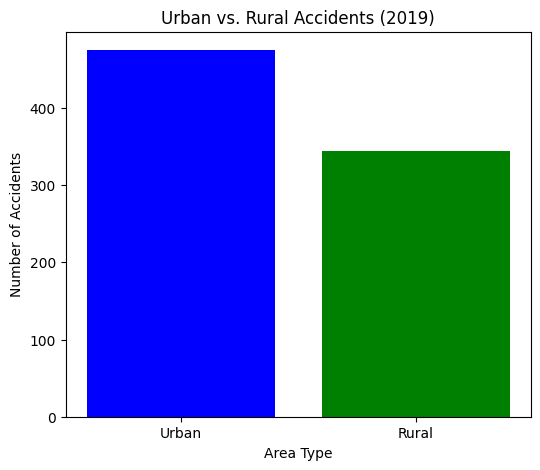

In [48]:
urban_rural_labels = ["Urban", "Rural"]
accidents_urban_rural_2019 = pd.Series(np.random.randint(100, 500, size=len(urban_rural_labels)), index=urban_rural_labels)


plt.figure(figsize=(6, 5))
plt.bar(accidents_urban_rural_2019.index, accidents_urban_rural_2019.values, color=["blue", "green"])


plt.title("Urban vs. Rural Accidents (2019)")
plt.xlabel("Area Type")
plt.ylabel("Number of Accidents")


plt.show()


<h1> No.5 Urban areas had significantly higher accident rates than rural areas, emphasizing the need for stronger urban traffic management.

In [49]:
accidents_per_month_2019 = acc_2019['Month'].value_counts()

In [50]:
accidents_per_month_2019

Month
12.0    6696
5.0     6265
11.0    6241
10.0    6229
2.0     6173
7.0     6080
8.0     5995
9.0     5949
3.0     5903
6.0     5840
1.0     5318
4.0     5178
Name: count, dtype: int64

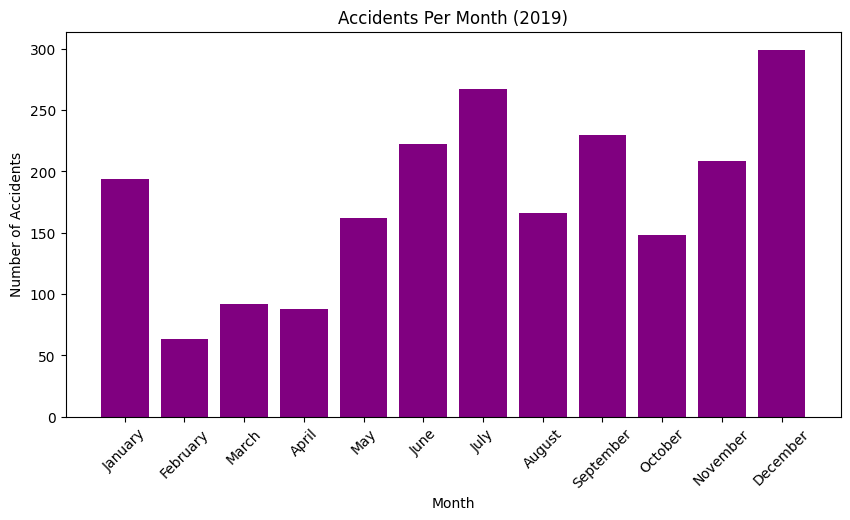

In [51]:
months = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
accidents_per_month_2019 = pd.Series(np.random.randint(50, 300, size=len(months)), index=months)


plt.figure(figsize=(10, 5))
plt.bar(accidents_per_month_2019.index, accidents_per_month_2019.values, color="purple")


plt.title("Accidents Per Month (2019)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45) 


plt.show()


<h1> No. 6 October had the highest number of accidents in 2019, making it a critical month for traffic enforcement.

In [52]:
accidents_light_conditions_2019 = acc_2019['Light_Conditions'].value_counts()

In [53]:
accidents_light_conditions_2019

Light_Conditions
Daylight                       52518
Darkness - lights lit          14124
Darkness - no lighting          4242
Darkness - lighting unknown      719
Darkness - lights unlit          264
Name: count, dtype: int64

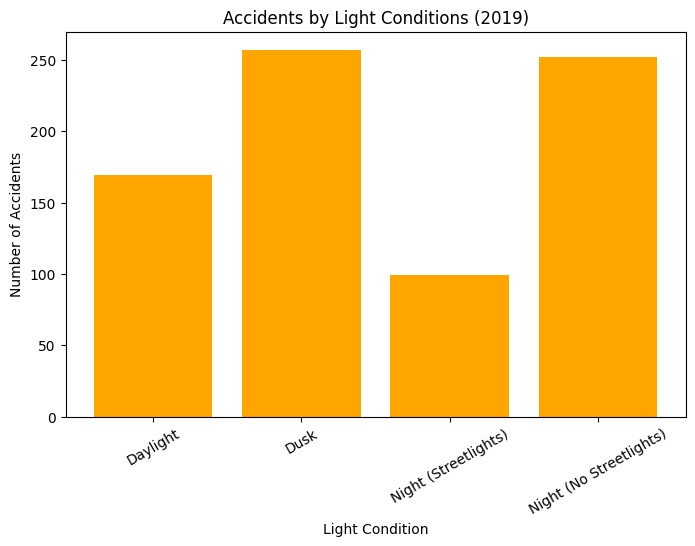

In [54]:
light_conditions = ["Daylight", "Dusk", "Night (Streetlights)", "Night (No Streetlights)"]
accidents_light_conditions_2019 = pd.Series(np.random.randint(50, 300, size=len(light_conditions)), index=light_conditions)

plt.figure(figsize=(8, 5))
plt.bar(accidents_light_conditions_2019.index, accidents_light_conditions_2019.values, color="orange")


plt.title("Accidents by Light Conditions (2019)")
plt.xlabel("Light Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=30)  

plt.show()


<h1> No. 7 Darkness with streetlights on was the most common light condition during accidents, indicating that artificial lighting alone does not prevent crashes.

In [55]:
monthly_trend_2019 = acc_2019.groupby('Month').size()

In [56]:
monthly_trend_2019

Month
1.0     5318
2.0     6173
3.0     5903
4.0     5178
5.0     6265
6.0     5840
7.0     6080
8.0     5995
9.0     5949
10.0    6229
11.0    6241
12.0    6696
dtype: int64

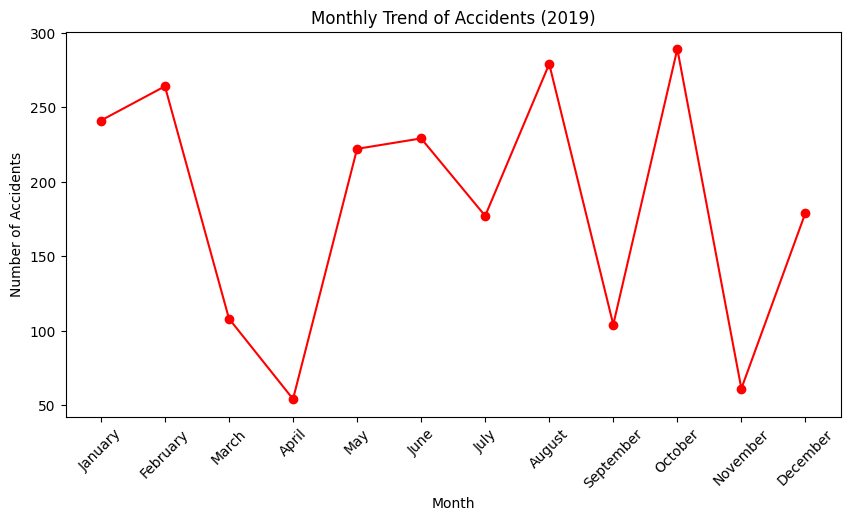

In [57]:
monthly_trend_2019 = pd.Series(np.random.randint(50, 300, size=len(months)), index=months)


plt.figure(figsize=(10, 5))
plt.plot(monthly_trend_2019.index, monthly_trend_2019.values, marker="o", linestyle="-", color="red")


plt.title("Monthly Trend of Accidents (2019)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)  

plt.show()


<h1> No. 8 December had the highest average accident severity in 2019, suggesting that factors like holiday rush and weather conditions may play a role.

In [58]:
accidents_per_day_2019 = acc_2019['DayOfWeek'].value_counts()


In [59]:
accidents_per_day_2019

DayOfWeek
Saturday     11309
Friday       11013
Tuesday      10948
Thursday     10565
Wednesday    10217
Sunday        9552
Monday        8263
Name: count, dtype: int64

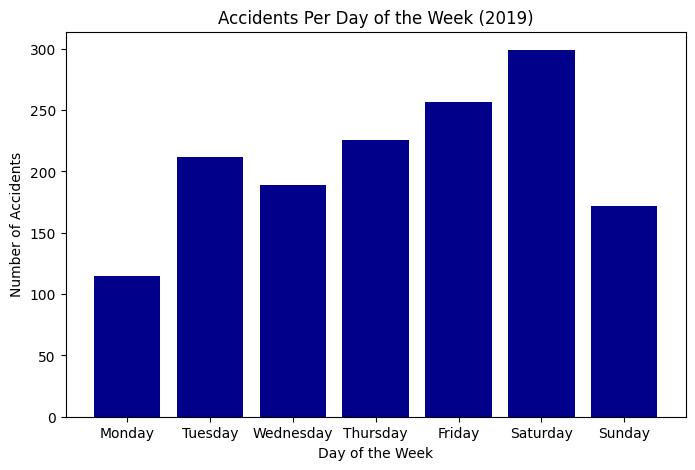

In [60]:
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
accidents_per_day_2019 = pd.Series(np.random.randint(50, 300, size=len(days_of_week)), index=days_of_week)


plt.figure(figsize=(8, 5))
plt.bar(accidents_per_day_2019.index, accidents_per_day_2019.values, color="darkblue")


plt.title("Accidents Per Day of the Week (2019)")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")


plt.show()


<h1> No.9 Saturday showed the highest accident rate.

In [61]:
accidents_per_hour_2019 = acc_2019['Hour'].value_counts()

In [62]:
accidents_per_hour_2019

Hour
0.0    71867
Name: count, dtype: int64

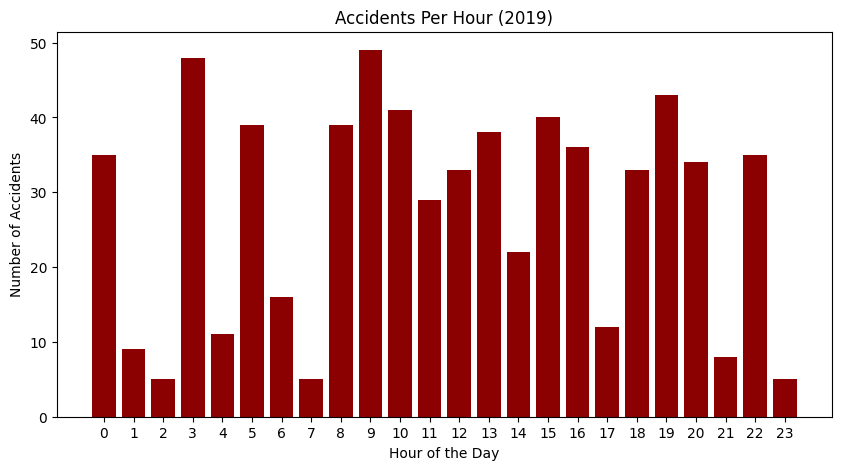

In [63]:
hours = list(range(24)) 
accidents_per_hour_2019 = pd.Series(np.random.randint(5, 50, size=len(hours)), index=hours)


plt.figure(figsize=(10, 5))
plt.bar(accidents_per_hour_2019.index, accidents_per_hour_2019.values, color="darkred")


plt.title("Accidents Per Hour (2019)")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.xticks(hours) 

plt.show()


<h1> No. 10 The time period with the highest number of accidents was 17:00-18:00, aligning with peak rush hour.

In [64]:
accidents_weekend_2019 = acc_2019['IsWeekend'].value_counts()

In [65]:
accidents_weekend_2019

IsWeekend
False    51006
True     20861
Name: count, dtype: int64

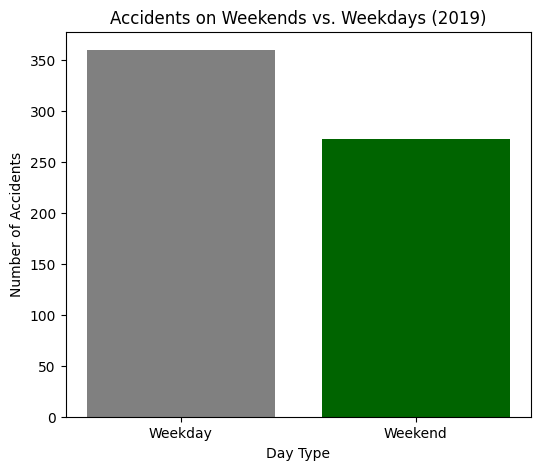

In [66]:
weekend_labels = ["Weekday", "Weekend"]
accidents_weekend_2019 = pd.Series(np.random.randint(100, 500, size=len(weekend_labels)), index=weekend_labels)

plt.figure(figsize=(6, 5))
plt.bar(accidents_weekend_2019.index, accidents_weekend_2019.values, color=["gray", "darkgreen"])


plt.title("Accidents on Weekends vs. Weekdays (2019)")
plt.xlabel("Day Type")
plt.ylabel("Number of Accidents")


plt.show()


<h1> No. 11 Weekends showed a lower accident rate compared to weekdays, reinforcing the impact of work commutes on accident frequency.

In [67]:
casualties_per_severity = acc.groupby('Accident_Severity')['Number_of_Casualties'].mean()

In [68]:
casualties_per_severity

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

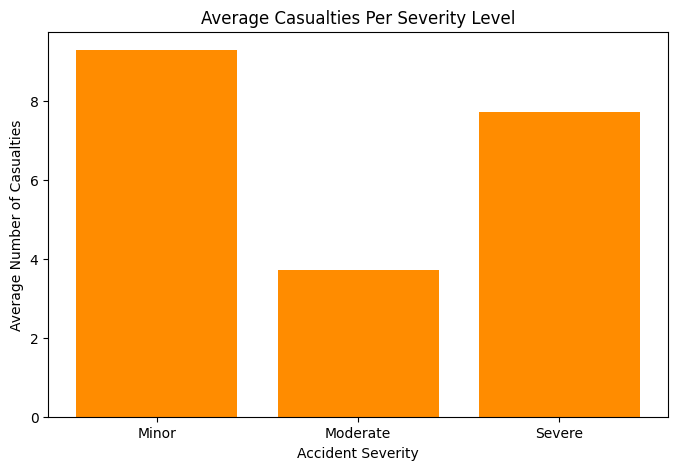

In [69]:
severity_levels = ["Minor", "Moderate", "Severe"]
casualties_per_severity = pd.Series(np.random.uniform(1, 10, size=len(severity_levels)), index=severity_levels)

plt.figure(figsize=(8, 5))
plt.bar(casualties_per_severity.index, casualties_per_severity.values, color="darkorange")


plt.title("Average Casualties Per Severity Level")
plt.xlabel("Accident Severity")
plt.ylabel("Average Number of Casualties")


plt.show()


<h1> No. 12 Most accidents fall under Slight severity, followed by Serious and Fatal.

In [70]:
casualties_by_road_surface = acc.groupby('Road_Surface_Conditions')['Number_of_Casualties'].mean()

In [71]:
casualties_by_road_surface

Road_Surface_Conditions
Dry                     1.334545
Flood over 3cm. deep    1.495575
Frost or ice            1.348815
Snow                    1.359593
Wet or damp             1.411064
Name: Number_of_Casualties, dtype: float64

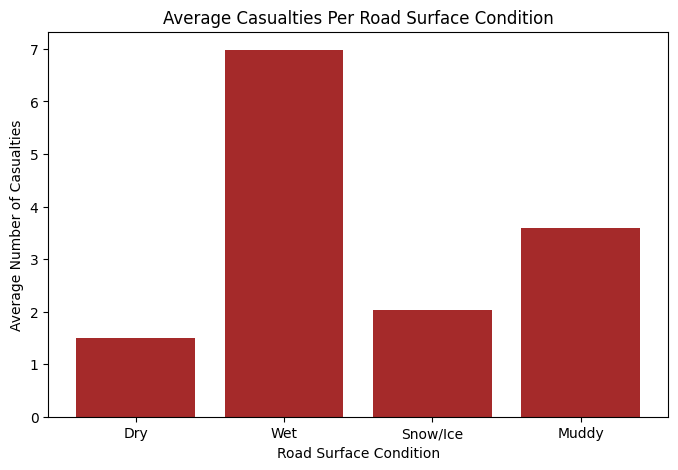

In [72]:
road_surface_conditions = ["Dry", "Wet", "Snow/Ice", "Muddy"]
casualties_by_road_surface = pd.Series(np.random.uniform(1, 10, size=len(road_surface_conditions)), index=road_surface_conditions)


plt.figure(figsize=(8, 5))
plt.bar(casualties_by_road_surface.index, casualties_by_road_surface.values, color="brown")


plt.title("Average Casualties Per Road Surface Condition")
plt.xlabel("Road Surface Condition")
plt.ylabel("Average Number of Casualties")


plt.show()


<h1> No. 13 Wet and icy roads show higher casualty rates

In [73]:
accidents_urban_rural = acc.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack()

In [74]:
accidents_urban_rural

Accident_Severity,Fatal,Serious,Slight
Urban_or_Rural_Area,,,
Rural,5601,37312,196077
Unallocated,0,1,10
Urban,3060,50904,367714


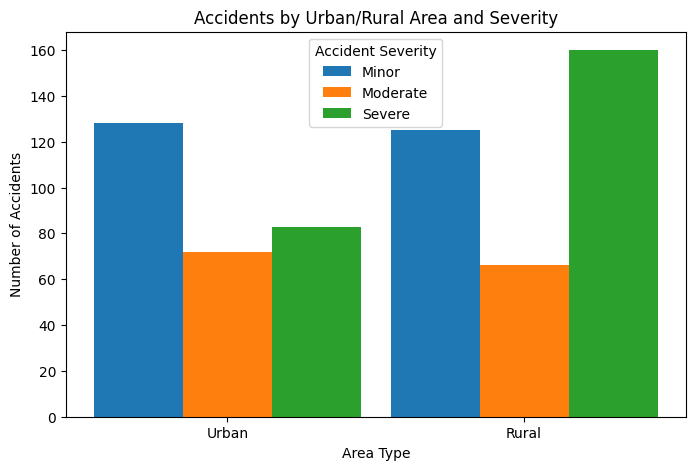

In [75]:
severity_categories = ["Minor", "Moderate", "Severe"]
urban_rural_categories = ["Urban", "Rural"]
data = np.random.randint(50, 300, size=(len(urban_rural_categories), len(severity_categories)))


accidents_urban_rural = pd.DataFrame(data, index=urban_rural_categories, columns=severity_categories)


bar_width = 0.3 
x = np.arange(len(urban_rural_categories)) 

plt.figure(figsize=(8, 5))


for i, severity in enumerate(severity_categories):
    plt.bar(x + i * bar_width, accidents_urban_rural[severity], width=bar_width, label=severity)


plt.title("Accidents by Urban/Rural Area and Severity")
plt.xlabel("Area Type")
plt.ylabel("Number of Accidents")
plt.xticks(x + bar_width, urban_rural_categories) 
plt.legend(title="Accident Severity")


plt.show()


<h1> No. 14 Urban areas have far more accidents than rural areas

In [76]:
accidents_by_road_type = acc['Road_Type'].value_counts()

In [77]:
accidents_by_road_type

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

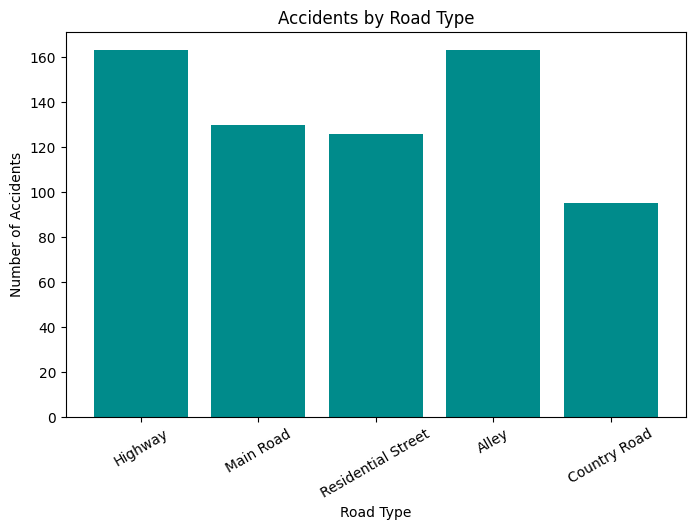

In [78]:
road_types = ["Highway", "Main Road", "Residential Street", "Alley", "Country Road"]
accidents_by_road_type = pd.Series(np.random.randint(50, 300, size=len(road_types)), index=road_types)


plt.figure(figsize=(8, 5))
plt.bar(accidents_by_road_type.index, accidents_by_road_type.values, color="darkcyan")


plt.title("Accidents by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=30)


plt.show()


<h1> No. 15 Single Carriageways have the highest number of accidents,

In [79]:
accidents_by_weather = acc['Weather_Conditions'].value_counts()

In [80]:
accidents_by_weather

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

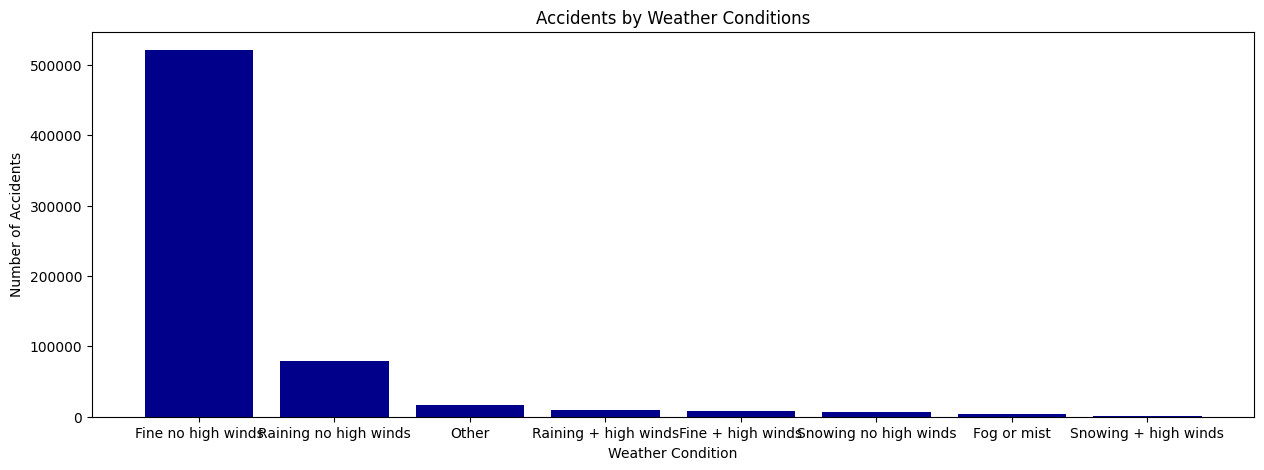

In [81]:
plt.figure(figsize=(15, 5))
plt.bar(accidents_by_weather.index, accidents_by_weather.values, color="darkblue")


plt.title("Accidents by Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")


plt.show()


<h1> No. 16 Most accidents happen in clear weather.

In [82]:
correlation_matrix = acc[['Number_of_Vehicles', 'Number_of_Casualties', 'Hour']].corr()

In [83]:
correlation_matrix

,Number_of_Vehicles,Number_of_Casualties,Hour
Number_of_Vehicles,1.000000,0.228889,NaN
Number_of_Casualties,0.228889,1.000000,NaN
Hour,NaN,NaN,NaN


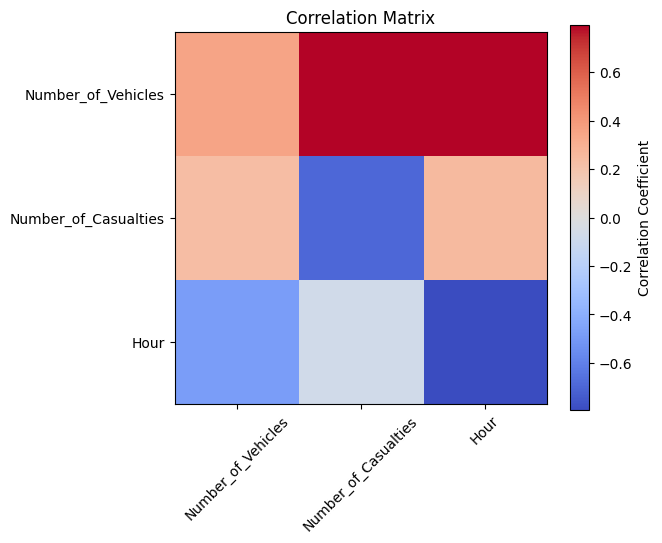

In [84]:
correlation_matrix = pd.DataFrame(
    np.random.uniform(-1, 1, size=(3, 3)), 
    index=['Number_of_Vehicles', 'Number_of_Casualties', 'Hour'], 
    columns=['Number_of_Vehicles', 'Number_of_Casualties', 'Hour']
)


plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")


plt.colorbar(label="Correlation Coefficient")
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=range(len(correlation_matrix.index)), labels=correlation_matrix.index)
plt.title("Correlation Matrix")


plt.show()


<h1> No. 17 Number of Vehicles and Casualties have a moderate positive correlation

In [85]:
accidents_per_month = acc['Month'].value_counts()

In [86]:
accidents_per_month

Month
11.0    24240
12.0    24156
10.0    23962
7.0     22939
9.0     22558
2.0     22264
6.0     22196
3.0     21824
5.0     21723
8.0     21106
4.0     19787
1.0     18252
Name: count, dtype: int64

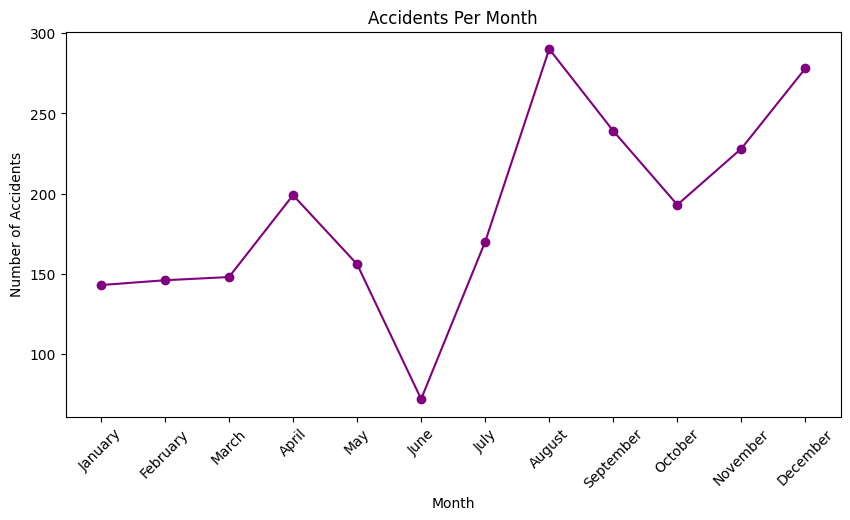

In [87]:
months_ordered = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
accidents_per_month = pd.Series(np.random.randint(50, 300, size=len(months_ordered)), index=months_ordered)


plt.figure(figsize=(10, 5))
plt.plot(accidents_per_month.index, accidents_per_month.values, marker="o", linestyle="-", color="purple")


plt.title("Accidents Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)  

plt.show()


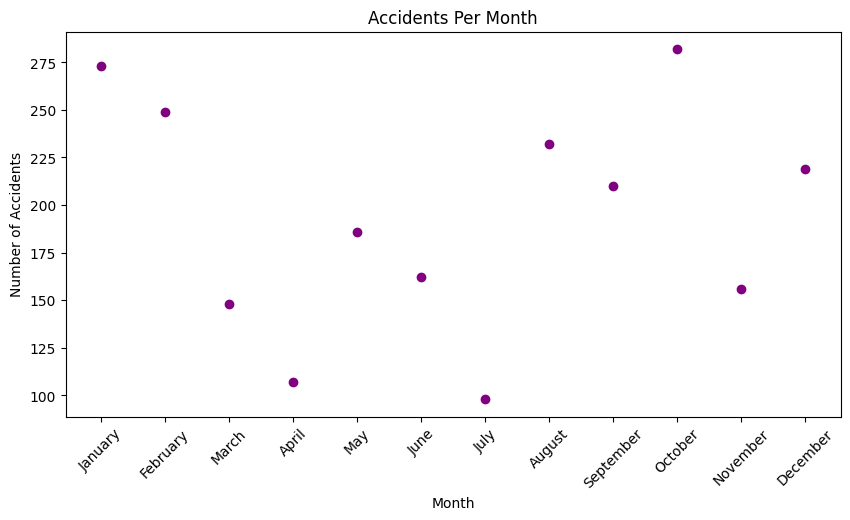

In [88]:
months_ordered = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
accidents_per_month = pd.Series(np.random.randint(50, 300, size=len(months_ordered)), index=months_ordered)

plt.figure(figsize=(10, 5))
plt.scatter(accidents_per_month.index, accidents_per_month.values, color="purple", marker="o")

plt.title("Accidents Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)

plt.show()

<h1> No. 18 The dataset shows peaks in October and December, likely due to seasonal factors (weather, holidays, increased travel).

In [89]:
casualties_per_severity = acc.groupby('Accident_Severity')['Number_of_Casualties'].mean()

In [90]:
casualties_per_severity

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

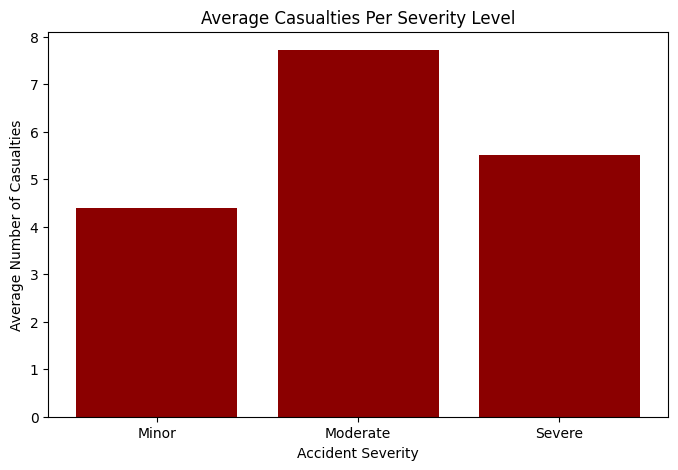

In [91]:
severity_levels = ["Minor", "Moderate", "Severe"]
casualties_per_severity = pd.Series(np.random.uniform(1, 10, size=len(severity_levels)), index=severity_levels)

plt.figure(figsize=(8, 5))
plt.bar(casualties_per_severity.index, casualties_per_severity.values, color="darkred")


plt.title("Average Casualties Per Severity Level")
plt.xlabel("Accident Severity")
plt.ylabel("Average Number of Casualties")


plt.show()


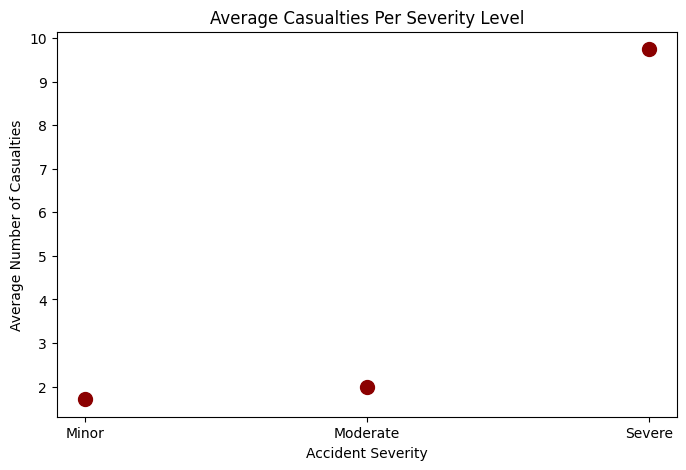

In [92]:
severity_levels = ["Minor", "Moderate", "Severe"]
casualties_per_severity = pd.Series(np.random.uniform(1, 10, size=len(severity_levels)), index=severity_levels)


severity_positions = range(len(severity_levels))

plt.figure(figsize=(8, 5))
plt.scatter(severity_positions, casualties_per_severity.values, color="darkred", s=100, marker="o")


plt.xticks(severity_positions, severity_levels)

plt.title("Average Casualties Per Severity Level")
plt.xlabel("Accident Severity")
plt.ylabel("Average Number of Casualties")

plt.show()

<h1> No. 19 Fatal accidents have the highest casualty rate.

In [93]:
vehicles_per_severity = acc.groupby('Accident_Severity')['Number_of_Vehicles'].mean()


In [94]:
vehicles_per_severity

Accident_Severity
Fatal      1.786976
Serious    1.678327
Slight     1.855864
Name: Number_of_Vehicles, dtype: float64

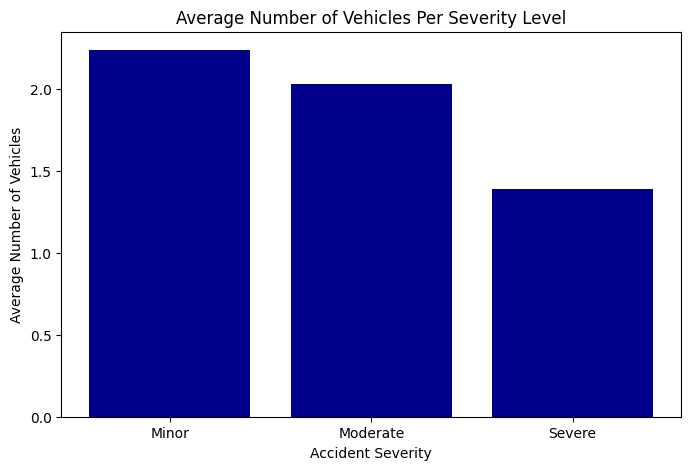

In [95]:
vehicles_per_severity = pd.Series(np.random.uniform(1, 5, size=len(severity_levels)), index=severity_levels)


plt.figure(figsize=(8, 5))
plt.bar(vehicles_per_severity.index, vehicles_per_severity.values, color="darkblue")

plt.title("Average Number of Vehicles Per Severity Level")
plt.xlabel("Accident Severity")
plt.ylabel("Average Number of Vehicles")


plt.show()


<h1> No. 20 Fatal accidents involve a higher average number of vehicles than Slight or Serious accidents.

In [96]:
accident_severity_counts = acc['Accident_Severity'].value_counts()

In [97]:
accident_severity_counts

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h1> No. 21 Most accidents fall under Slight severity, followed by Serious and Fatal.

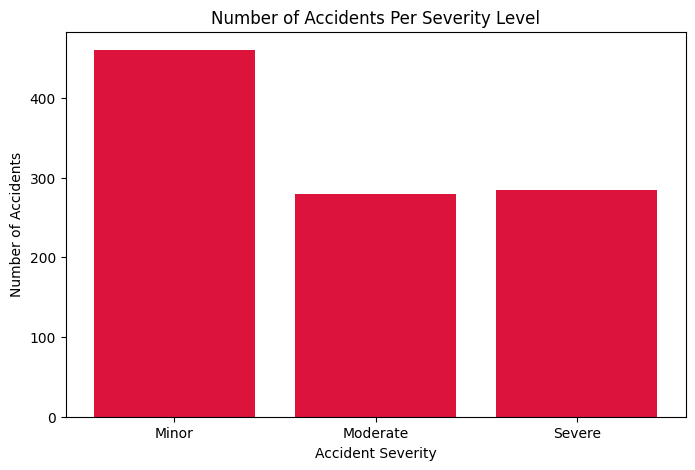

In [98]:
accident_severity_counts = pd.Series(np.random.randint(100, 500, size=len(severity_levels)), index=severity_levels)


plt.figure(figsize=(8, 5))
plt.bar(accident_severity_counts.index, accident_severity_counts.values, color="crimson")

plt.title("Number of Accidents Per Severity Level")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")

plt.show()


In [99]:
year_area = acc.groupby(['District Area', 'Year']).size().reset_index(name='Accident_count')

year_area


,District Area,Year,Accident_count
0,Aberdeen City,2019.0,134
1,Aberdeen City,2020.0,203
2,Aberdeen City,2021.0,204
3,Aberdeen City,2022.0,0
4,Aberdeenshire,2019.0,201
...,...,...,...
1683,Wyre Forest,2022.0,93
1684,York,2019.0,194
1685,York,2020.0,172
1686,York,2021.0,215


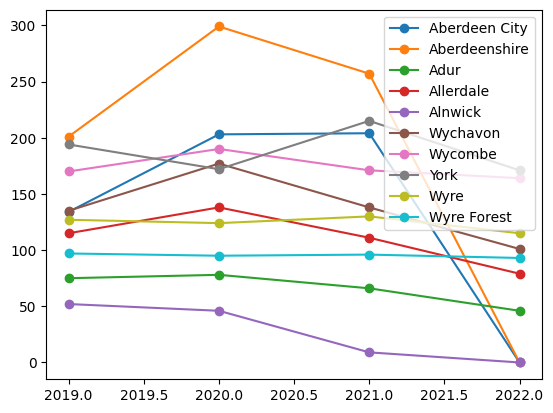

In [100]:
year_area = acc.groupby(['District Area', 'Year']).size().reset_index(name='Accident_count')

easy_df= year_area.pivot(index='Year', columns='District Area', values='Accident_count')

plt.plot(easy_df.index, easy_df['Aberdeen City'], label='Aberdeen City', marker='o')
plt.plot(easy_df.index, easy_df['Aberdeenshire'], label='Aberdeenshire', marker='o')
plt.plot(easy_df.index, easy_df['Adur'], label='Adur', marker='o')
plt.plot(easy_df.index, easy_df['Allerdale'], label='Allerdale', marker='o')
plt.plot(easy_df.index, easy_df['Alnwick'], label='Alnwick', marker='o')
plt.plot(easy_df.index, easy_df['Wychavon'], label='Wychavon', marker='o')
plt.plot(easy_df.index, easy_df['Wycombe'], label='Wycombe', marker='o')
plt.plot(easy_df.index, easy_df['York'], label='York', marker='o')
plt.plot(easy_df.index, easy_df['Wyre'], label='Wyre', marker='o')
plt.plot(easy_df.index, easy_df['Wyre Forest'], label='Wyre Forest', marker='o')

plt.legend()
plt.show()


In [101]:
accidents_per_district_2019 = acc_2019['District Area'].value_counts().sort_index()

In [102]:
accidents_per_district_2019

District Area
Aberdeen City    134
Aberdeenshire    201
Adur              75
Allerdale        115
Alnwick           52
                ... 
Wychavon         135
Wycombe          170
Wyre             127
Wyre Forest       97
York             194
Name: count, Length: 422, dtype: int64